## Task 1 and 2

Shaiha E K 21ME10075

In [4]:
import numpy as np
import matplotlib.pyplot as plt


def f(x, y):
    return (x**2 - 1)**2 + y**2

def grad_f(x, y):
    df_dx = 4 * x * (x**2 - 1)
    df_dy = 2 * y
    return np.array([df_dx, df_dy])

def steepest_descent(x0, y0, alpha=0.1, tol=1e-6, max_iter=1000):
   
    # Define the gradient of the function f(x, y)
    # Initialize the starting point and path
    point = np.array([x0, y0])
    path = [point.copy()]

    # Iteration process
    for _ in range(max_iter):
        gradient = grad_f(point[0], point[1])
        norm_grad = np.linalg.norm(gradient)

        # Check if the magnitude of the gradient is less than the tolerance
        if norm_grad < tol:
            break

        # Update the point
        point = point - alpha * gradient
        path.append(point.copy())

    # Convert path to a numpy array for easier handling
    path = np.array(path)

    return point, path

## Task 3

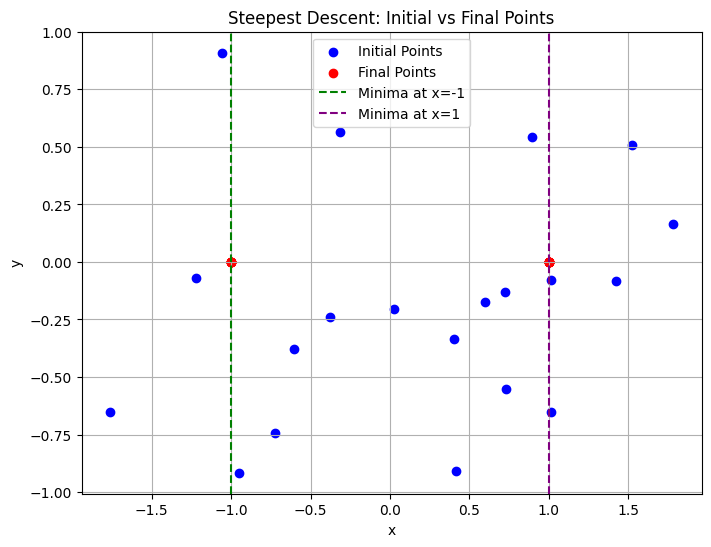

In [5]:
def generate_random_points(num_points):
    x_values = np.random.uniform(-2, 2, num_points)
    y_values = np.random.uniform(-1, 1, num_points)
    return x_values, y_values


num_points = 20
alpha = 0.1
tol = 1e-6
max_iter = 1000

x_values, y_values = generate_random_points(num_points)
final_points = []

# Run steepest descent for each initial point
for x0, y0 in zip(x_values, y_values):
    final_point, _ = steepest_descent(x0, y0, alpha, tol, max_iter)
    final_points.append(final_point)

final_points = np.array(final_points)

# Visualize the final points
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, color='blue', label='Initial Points')
plt.scatter(final_points[:, 0], final_points[:, 1],
            color='red', label='Final Points')
plt.xlabel('x')
plt.ylabel('y')
plt.axvline(x=-1, color='green', linestyle='--', label='Minima at x=-1')
plt.axvline(x=1, color='purple', linestyle='--', label='Minima at x=1')
plt.title('Steepest Descent: Initial vs Final Points')
plt.legend()
plt.grid(True)
plt.show()

## Task 4

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8100\2713536348.py:14: RuntimeWarning: overflow encountered in double_scalars
  df_dx = 4 * x * (x**2 - 1)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8100\2713536348.py:32: RuntimeWarning: invalid value encountered in subtract
  point = point - alpha * gradient


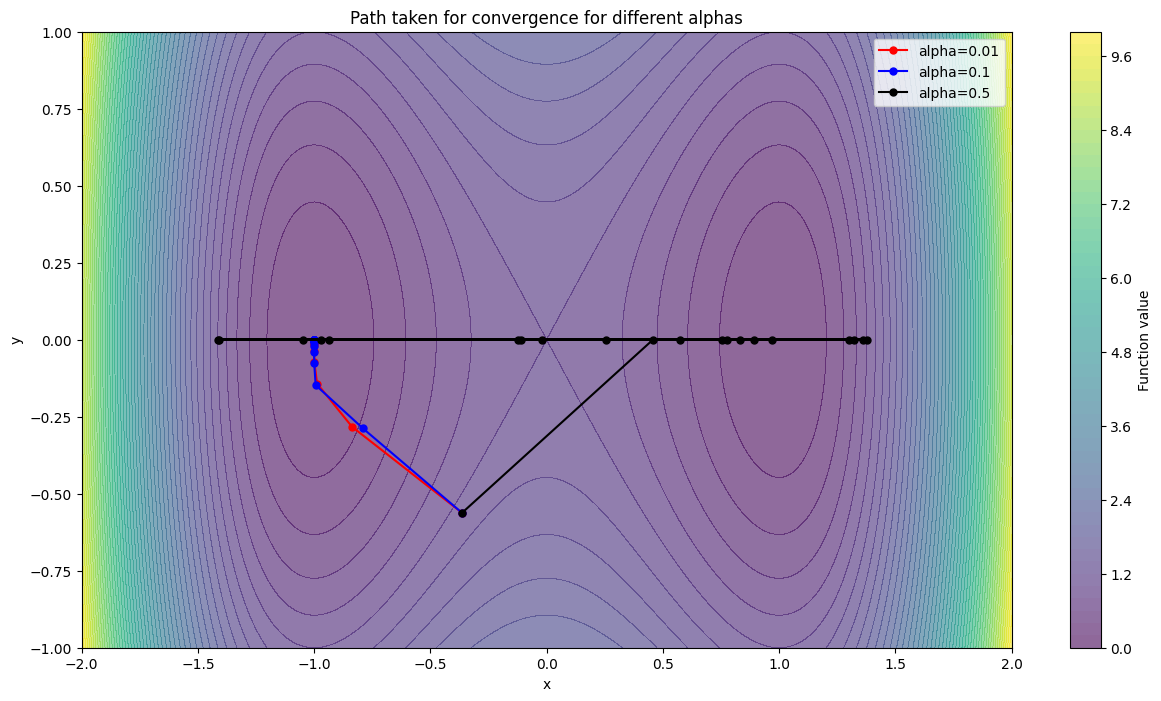

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Function to evaluate the double-well potential


def f(x, y):
    return (x**2 - 1)**2 + y**2

# Gradient of the function


def f_grad(x, y):
    df_dx = 4 * x * (x**2 - 1)
    df_dy = 2 * y
    return np.array([df_dx, df_dy])

# Steepest descent algorithm


def steepest_descent(x0, y0, alpha=0.1, tol=1e-6, max_iter=1000):
    point = np.array([x0, y0])
    path_points = [point]  # Using list for easier accumulation

    for _ in range(max_iter):
        gradient = f_grad(point[0], point[1])
        norm_grad = np.linalg.norm(gradient)

        if norm_grad < tol:
            break

        point = point - alpha * gradient
        path_points.append(point)

    return point, np.array(path_points)

# Generate random initial points within a given range


def generate_random_points(num_points):
    x_values = np.random.uniform(-2, 2, num_points)
    y_values = np.random.uniform(-1, 1, num_points)
    return x_values, y_values


# Main analysis
alphas = [0.01, 0.1, 0.5, 1]
num_points = 5  # Number of random initial points to test
tol = 1e-6  # Convergence tolerance
max_iter = 1000  # Maximum number of iterations

# Generate random initial points
x_values, y_values = generate_random_points(num_points)

# Dictionary to store final points and paths for each alpha
paths_by_alpha = {}

for alpha in alphas:
    final_points = []
    paths = []

    for x0, y0 in zip(x_values, y_values):
        final_point, path = steepest_descent(x0, y0, alpha, tol, max_iter)
        final_points.append(final_point)
        paths.append(path)

    paths_by_alpha[alpha] = {'final_points': final_points, 'paths': paths}

# Prepare the grid for contour plotting
x_grid = np.linspace(-2, 2, 500)
y_grid = np.linspace(-1, 1, 500)
X, Y = np.meshgrid(x_grid, y_grid)
Z = f(X, Y)

# Plotting the paths
plt.figure(figsize=(15, 8))
contour = plt.contourf(X, Y, Z, levels=50, cmap='viridis', alpha=0.6)
plt.colorbar(contour, label='Function value')

colors = ['r', 'b', 'k', 'm']

for (alpha, data), c in zip(paths_by_alpha.items(), colors):
    for final_point, path in zip(data['final_points'], data['paths']):
        if np.isnan(final_point[0]) or np.isnan(final_point[1]):
            continue
        trajectory_x, trajectory_y = path.T
        plt.plot(trajectory_x[::len(trajectory_x)//20], trajectory_y[::len(
            trajectory_y)//20], f'{c}-o', markersize=5, label=f'alpha={alpha}')
        break

plt.legend()
plt.title('Path taken for convergence for different alphas')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Task 5

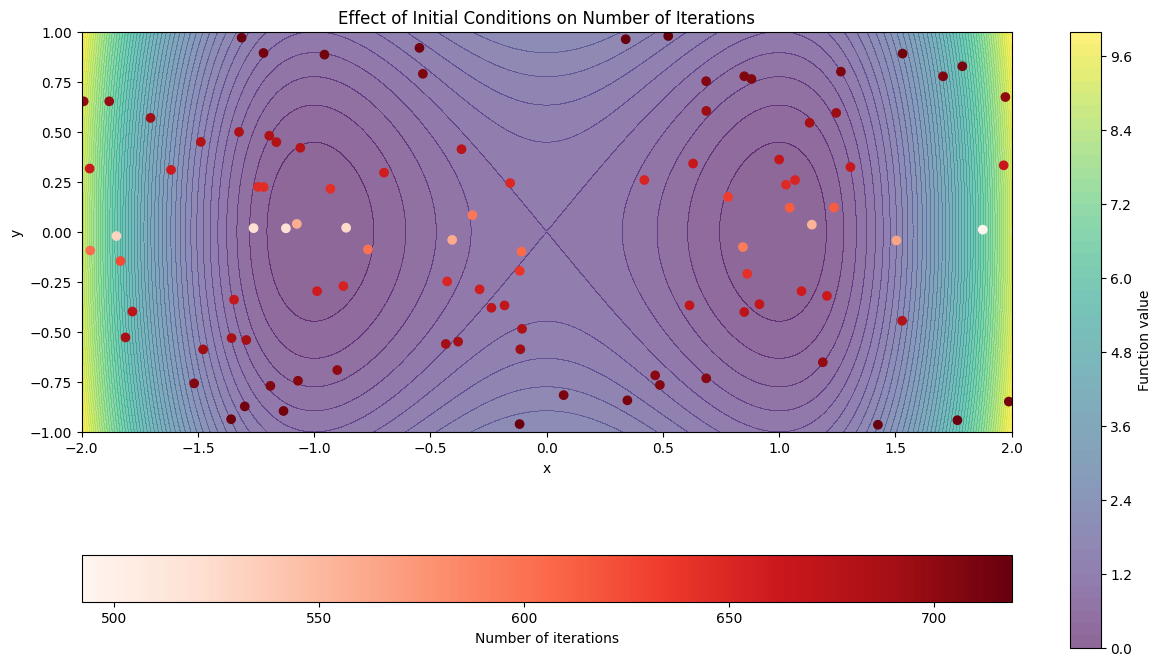

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Function to evaluate the double-well potential


def f(x, y):
    return (x**2 - 1)**2 + y**2

# Gradient of the function


def f_grad(x, y):
    df_dx = 4 * x * (x**2 - 1)
    df_dy = 2 * y
    return np.array([df_dx, df_dy])

# Steepest descent algorithm


def steepest_descent(x0, y0, alpha=0.1, tol=1e-6, max_iter=1000):
    point = np.array([x0, y0])
    path_points = [point]
    iteration_count = 0

    for _ in range(max_iter):
        iteration_count += 1
        gradient = f_grad(point[0], point[1])
        norm_grad = np.linalg.norm(gradient)

        if norm_grad < tol:
            break

        point = point - alpha * gradient
        path_points.append(point)

    return point, np.array(path_points), iteration_count

# Function to generate random initial points


def generate_random_points(num_points):
    x_values = np.random.uniform(-2, 2, num_points)
    y_values = np.random.uniform(-1, 1, num_points)
    return x_values, y_values


# Main analysis
np.random.seed(54)
num_points = 100  # Number of random initial points to test
alpha = 0.01  # Learning rate
tol = 1e-6  # Convergence tolerance
max_iter = 1000  # Maximum number of iterations

# Generate random initial points
x_values, y_values = generate_random_points(num_points)

# Lists to store final points and the number of iterations for each initial point
final_points = []
n_iterations = []

# Run steepest descent from each initial point
for (x0, y0) in zip(x_values, y_values):
    final_point, _, n = steepest_descent(x0, y0, alpha, tol, max_iter)
    final_points.append(final_point)
    n_iterations.append(n)

# Create a grid for the contour plot
x_grid = np.linspace(-2, 2, 500)
y_grid = np.linspace(-1, 1, 500)
X, Y = np.meshgrid(x_grid, y_grid)
Z = f(X, Y)

# Plotting the contour and the initial points
plt.figure(figsize=(15, 8))
contour = plt.contourf(X, Y, Z, levels=50, cmap='viridis', alpha=0.6)
plt.colorbar(contour, label='Function value')

# Scatter plot of initial points colored by the number of iterations
plt.scatter(x_values, y_values, c=n_iterations, cmap='Reds')
plt.colorbar(label='Number of iterations', orientation='horizontal', pad=0.2)

plt.title('Effect of Initial Conditions on Number of Iterations')
plt.xlabel('x')
plt.ylabel('y')
plt.show()